### Building a simple classification model using scikit learn estimators

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
diabetes_data = pd.read_csv('pima_diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [3]:
diabetes_data.shape

(768, 9)

In [4]:
diabetes_data.describe() # to get statistical overview of the numeric features in the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-5.551115e-17,-1.619075e-17,6.938894e-18,1.006140e-16,-2.775558e-17,2.798687e-16,2.498002e-16,1.815677e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00,1.000000


In [5]:
#we will preprocess our data before fitting the classification model

In [6]:
from sklearn import preprocessing 
label_encoding = preprocessing.LabelEncoder() #instantiating a label encoder
#would have converted the outcome if it was not numeric already
diabetes_data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
397,-1.141852,0.316272,-0.160546,1.220910,-0.692891,0.292856,-0.833179,-0.956462,1
539,-0.250952,0.253678,1.183596,1.785463,0.652958,0.559387,1.498352,-0.105584,1
545,1.233880,2.037615,1.080200,0.907270,1.260761,0.318240,-0.147612,0.319855,1
196,-0.844885,-0.497453,-0.574128,-1.288212,-0.692891,-0.976336,-0.860360,-1.041549,0
474,0.046014,-0.215779,-0.263941,-1.288212,-0.692891,-0.392508,-1.044587,-0.786286,0
257,-0.547919,-0.215779,-0.057150,0.091805,-0.692891,-0.417892,-1.147272,-0.701198,0
351,0.046014,0.504055,0.770014,-1.288212,-0.692891,-0.100593,-0.664053,-0.275760,0
685,-0.547919,0.253678,0.253036,0.342717,1.087103,0.153245,0.359768,-0.701198,0
453,-0.547919,-0.059293,-3.572597,-1.288212,-0.692891,-1.572857,1.087616,3.297926,0
392,-0.844885,0.316272,-0.263941,-0.410019,2.910511,-1.052488,-0.250296,-1.041549,0


In [7]:
#the classes will tell us what classes are numeric integers
#label_encoding.classes_ #this is giving me an error

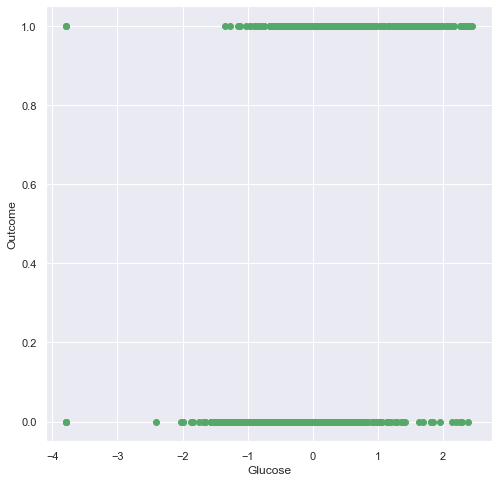

In [8]:
#checking for a relationship between glucose and outcome 
plt.figure(figsize = (8,8))
plt.scatter(diabetes_data['Glucose'], diabetes_data['Outcome'], c = 'g')
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.show()

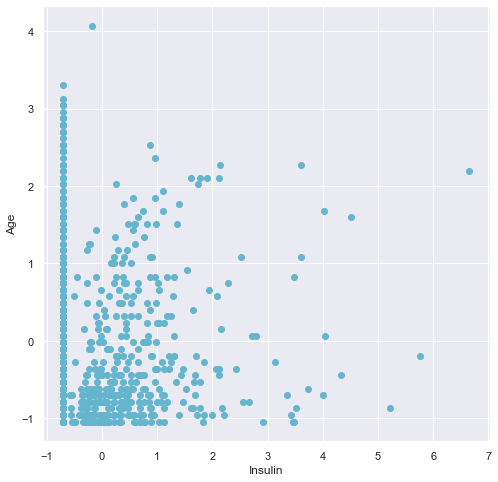

In [9]:
#the relationship is peoople eith daibetes seem to have higher glucose levels

#age and insulin levels
plt.figure(figsize = (8,8))
plt.scatter(diabetes_data['Insulin'], diabetes_data['Age'], c = 'c')
plt.xlabel('Insulin')
plt.ylabel('Age')
plt.show()
#there is a correlation betwn the two varibale as seen below
#older individuals have higher insulin levels

In [10]:
#corrrelation is a quick way to get the idea of a variable in a data set
diabetes_data_correlation = diabetes_data.corr()
diabetes_data_correlation
#there is quiet a good correlation between age and pregnancy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


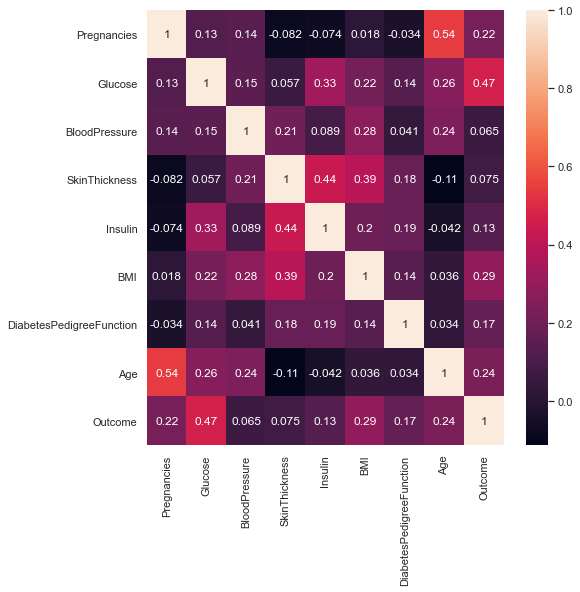

In [11]:
#let us build a correlation using a heatmap
fig, ax = plt.subplots(figsize = (8,8))
sns.heatmap(diabetes_data_correlation, annot = True)

In [12]:
#let us set up our trainin features and target labels
features = diabetes_data.drop('Outcome', axis = 1) #drop the outcome row
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [13]:
#standardization scales all of the data to be centered around the mean
#a common preprocessing technique used for numeric features
from sklearn import preprocessing
standard_scaler = preprocessing.StandardScaler()
features_scaled = standard_scaler.fit_transform(features)
features_scaled.shape

(768, 8)

In [14]:
#converting the array to a pandas data frame cause it is easier to work with
features_scaled_df = pd.DataFrame(features_scaled,columns = features.columns)
features_scaled_df.head()
#we have set up a new column but using the scaled features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [15]:
features_scaled_df.describe()
#we see our standard deviation is close to zero

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000,7.680000e+02,7.680000e+02
mean,-1.850372e-17,-1.619075e-17,2.312965e-18,4.510281e-17,-2.428613e-17,0.000000,9.251859e-18,-2.197316e-17
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-0.595578,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,0.000942,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,0.584771,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807,5.883565e+00,4.063716e+00


In [16]:
#creating a data frame withh our standardized data features
diabetes_data = pd.concat([features_scaled_df, diabetes_data['Outcome']], axis = 1) \
                                                                    .reset_index(drop=True)
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [17]:
diabetes_data.to_csv('pima_diabetes_processed.csv', index = False) #the file is processed to a csv file

In [18]:
#we can run it directly
!ls dataset

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
#setting up x features and target labels to fit our classification
#using the train test split function to 
#70% for training and 30% for testing
from sklearn.model_selection import train_test_split
X = diabetes_data.drop('Outcome', axis = 1)
Y = diabetes_data['Outcome']

In [20]:
x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.3)
x_train.shape, y_train.shape

((537, 8), (537,))

In [21]:
#the logistic regression will fit in this classifier
#from sklearn.linear_model import LogisticRegression
#classifier = LogisticRegression(penalty = '12', C= 1.0, solver= 'lbfgs')
#classifier.fit(x_train, y_train) #this starts the training process 

In [22]:
#using decision tree for classification
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 4)
classifier.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=4)

In [23]:
y_pred = classifier.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [24]:
pred_results = pd.DataFrame({'y_test':y_test,
                            'y_pred': y_pred})
pred_results.head(10)

,y_test,y_pred
76,0,0
20,0,0
23,1,0
206,1,1
452,0,0
400,1,0
718,0,0
299,0,0
482,0,0
265,0,1


In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model_accuracy = accuracy_score(y_test, y_pred)
model_precision = precision_score(y_test, y_pred)
model_recall = recall_score(y_test, y_pred)

print("Accuracy of model is {}%".format(model_accuracy * 100))
print("Precision of model is {}%".format(model_precision * 100))
print("Recall of model is {}%".format(model_recall * 100))

Accuracy of model is 67.53246753246754%
Precision of model is 53.62318840579711%
Recall of model is 46.25%


In [29]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
diabetes_crosstab  #a confusion matrix

y_test,0,1
y_pred,,
0,119,43
1,32,37


In [31]:
TP = diabetes_crosstab[1][1]
TN = diabetes_crosstab[0][0]
FP = diabetes_crosstab[0][1]
FN = diabetes_crosstab[1][0]

In [32]:
accuracy_score_verified = (TP + TN)/(TP + TN + FP + FN )
accuracy_score_verified

0.6753246753246753

In [33]:
precision_score_survived = TP/(TP + FP)
precision_score_survived

0.5362318840579711

In [34]:
recall_score_survived = TP/(TP + FN)
recall_score_survived

0.4625